In [13]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data=pd.read_csv('Datasheets/bank-full.csv')
data.head()
data.shape

(45211, 17)

In [15]:
data_num=data.select_dtypes('int64')
data_cat=data.select_dtypes(object)

In [16]:
new_data_cat=pd.get_dummies(data_cat.drop('Target',axis=1),drop_first=True)

In [17]:
new_data=pd.concat([data_num,new_data_cat],axis=1)

In [18]:
new_data.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [19]:
X=new_data
y=data['Target']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3344,41,849,15,72,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
17965,49,1415,30,269,2,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
18299,42,3842,31,130,4,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
10221,37,-119,11,375,11,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True
32192,56,3498,15,264,2,-1,0,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [22]:
model=RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [23]:
model.score(X,y)


0.9732144832009909

In [24]:
y_pred=model.predict(X_test)


In [25]:
accuracy_score(y_test,y_pred)

0.8992590954329316

<Axes: >

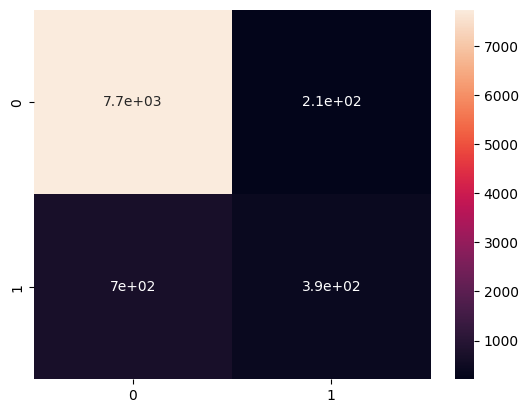

In [26]:
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)

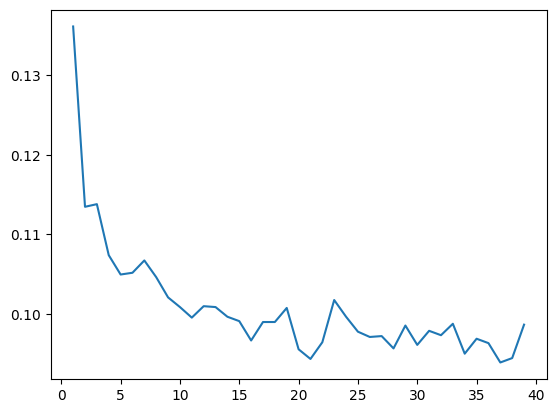

In [27]:
error=[]

for i in range(1,40):
    model2=RandomForestClassifier(n_estimators= i)
    model2.fit(X_train,y_train)

    pred=model2.predict(X_test)
    error.append( 1- accuracy_score(y_test,pred))

plt.plot(range(1,40),error)